<a href="https://colab.research.google.com/github/pratikbarjatya/covid19India/blob/master/Covid19India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid19India - EDA

Data Description
The dataset consists of the information about Covid19India cases taken from [Covid19India API](https://api.covid19india.org/raw_data.json). 
 
Below is a table showing names of all the columns and their description.
 
| Attributes | Dtype   |
|------|------|
| agebracket | object|
| backupnotes | object|
| contractedfromwhichpatientsuspected | object |
| currentstatus | object |
| dateannounced | object |
| detectedcity | object |
| detecteddistrict | object |
| detectedstate | object |
| estimatedonsetdate | object |
| gender | object |
| nationality | object |
| notes | object |
| patientnumber | object |
| source1 | object |
| source2 | object |
| source3 | object |
| statecode | object |
| statepatientnumber | object |
| statuschangedate | object |
| typeoftransmission | object |

## Import Libraries

In [ ]:
alpha=0.1
ratio=0.1

In [1]:
import os
from requests import request
import urllib.request
import json
from pandas.io.json import json_normalize

import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

# Read Data from [Covid19India API](https://api.covid19india.org/raw_data.json)

In [2]:
def read_from_api(URL):
    response = request(url=URL, method='get')
    x = URL.split('/').pop(-1)
    x = x[:-5]
    elevations = response.json()
    rec = elevations[x]
    return json_normalize(rec)

In [3]:
df_raw_data = read_from_api('https://api.covid19india.org/raw_data.json')
df_raw_data.head()

agebracket                                 backupnotes  \
0         20                          Student from Wuhan   
1                                     Student from Wuhan   
2                                     Student from Wuhan   
3         45         Travel history to Italy and Austria   
4         24  Travel history to Dubai, Singapore contact   

  contractedfromwhichpatientsuspected currentstatus dateannounced  \
0                                         Recovered    30/01/2020   
1                                         Recovered    02/02/2020   
2                                         Recovered    03/02/2020   
3                                         Recovered    02/03/2020   
4                                         Recovered    02/03/2020   

               detectedcity detecteddistrict detectedstate estimatedonsetdate  \
0                  Thrissur         Thrissur        Kerala                      
1                 Alappuzha        Alappuzha        Kerala                      
2                 Kasaragod        Kasaragod        Kerala                      
3  East Delhi (Mayur Vihar)       East Delhi         Delhi                      
4                 Hyderabad        Hyderabad     Telangana                      

  gender nationality                                              notes  \
0      F       India                               Travelled from Wuhan   
1              India                               Travelled from Wuhan   
2              India                               Travelled from Wuhan   
3      M       India                      Travelled from Austria, Italy   
4      M       India  Travelled from Dubai to Bangalore on 20th Feb,...   

  patientnumber                                            source1  \
0             1  https://twitter.com/vijayanpinarayi/status/122...   
1             2  https://www.indiatoday.in/india/story/kerala-r...   
2             3  https://www.indiatoday.in/india/story/kerala-n...   
3             4  https://www.indiatoday.in/india/story/not-a-ja...   
4             5  https://www.deccanherald.com/national/south/qu...   

                                             source2  \
0  https://weather.com/en-IN/india/news/news/2020...   
1  https://weather.com/en-IN/india/news/news/2020...   
2  https://twitter.com/ANI/status/122422148580539...   
3  https://economictimes.indiatimes.com/news/poli...   
4  https://www.indiatoday.in/india/story/coronavi...   

                                             source3 statecode  \
0                                                           KL   
1                                                           KL   
2  https://weather.com/en-IN/india/news/news/2020...        KL   
3                                                           DL   
4  https://www.thehindu.com/news/national/coronav...        TG   

  statepatientnumber statuschangedate typeoftransmission  
0           KL-TS-P1       14/02/2020           Imported  
1           KL-AL-P1       14/02/2020           Imported  
2           KL-KS-P1       14/02/2020           Imported  
3              DL-P1       15/03/2020           Imported  
4              TS-P1       02/03/2020           Imported

In [4]:
df_death_and_recoveries = read_from_api('https://api.covid19india.org/deaths_recoveries.json')
df_death_and_recoveries.head()

agebracket       city        date         district gender nationality  \
0         85     Mumbai  29/03/2020           Mumbai      M               
1         80     Mumbai  29/03/2020           Mumbai      M               
2         86  Ghatkopar  29/03/2020  Mumbai Suburban      F               
3                        29/03/2020           Mumbai                      
4                        29/03/2020           Mumbai                      

                                               notes  \
0  Suffering from Diabetes, had a pacemaker, no t...   
1  patient passed away at the Fortis Hospital, Mu...   
2                                                      
3                                                      
4                                                      

  patientnumbercouldbemappedlater patientstatus slno  \
0                                      Deceased    1   
1                                      Deceased    2   
2                                      Deceased    3   
3                                      Deceased    4   
4                                      Deceased    5   

                                             source1  \
0  https://arogya.maharashtra.gov.in/pdf/epressno...   
1  https://arogya.maharashtra.gov.in/pdf/epressno...   
2  https://arogya.maharashtra.gov.in/pdf/epressno...   
3  https://arogya.maharashtra.gov.in/pdf/epressno...   
4  https://arogya.maharashtra.gov.in/pdf/epressno...   

                                             source2 source3        state  \
0  https://www.deccanherald.com/national/west/dea...          Maharashtra   
1  https://www.indiatoday.in/india/story/coronavi...          Maharashtra   
2                                                             Maharashtra   
3                                                             Maharashtra   
4                                                             Maharashtra   

  statecode  
0        MH  
1        MH  
2        MH  
3        MH  
4        MH

In [5]:
response = request(url='https://api.covid19india.org/v2/state_district_wise.json',method='get')
elevations = response.json()
df_state_district_wise = json_normalize(elevations)

In [6]:
df_state_district_wise.head()

districtData      state
0  [{'district': 'Thrissur', 'confirmed': 13, 'la...     Kerala
1  [{'district': 'East Delhi', 'confirmed': 1, 'l...      Delhi
2  [{'district': 'Hyderabad', 'confirmed': 417, '...  Telangana
3  [{'district': 'Italians*', 'confirmed': 2, 'la...  Rajasthan
4  [{'district': 'Italians*', 'confirmed': 14, 'l...    Haryana

In [7]:
df_raw_data.head()

agebracket                                 backupnotes  \
0         20                          Student from Wuhan   
1                                     Student from Wuhan   
2                                     Student from Wuhan   
3         45         Travel history to Italy and Austria   
4         24  Travel history to Dubai, Singapore contact   

  contractedfromwhichpatientsuspected currentstatus dateannounced  \
0                                         Recovered    30/01/2020   
1                                         Recovered    02/02/2020   
2                                         Recovered    03/02/2020   
3                                         Recovered    02/03/2020   
4                                         Recovered    02/03/2020   

               detectedcity detecteddistrict detectedstate estimatedonsetdate  \
0                  Thrissur         Thrissur        Kerala                      
1                 Alappuzha        Alappuzha        Kerala                      
2                 Kasaragod        Kasaragod        Kerala                      
3  East Delhi (Mayur Vihar)       East Delhi         Delhi                      
4                 Hyderabad        Hyderabad     Telangana                      

  gender nationality                                              notes  \
0      F       India                               Travelled from Wuhan   
1              India                               Travelled from Wuhan   
2              India                               Travelled from Wuhan   
3      M       India                      Travelled from Austria, Italy   
4      M       India  Travelled from Dubai to Bangalore on 20th Feb,...   

  patientnumber                                            source1  \
0             1  https://twitter.com/vijayanpinarayi/status/122...   
1             2  https://www.indiatoday.in/india/story/kerala-r...   
2             3  https://www.indiatoday.in/india/story/kerala-n...   
3             4  https://www.indiatoday.in/india/story/not-a-ja...   
4             5  https://www.deccanherald.com/national/south/qu...   

                                             source2  \
0  https://weather.com/en-IN/india/news/news/2020...   
1  https://weather.com/en-IN/india/news/news/2020...   
2  https://twitter.com/ANI/status/122422148580539...   
3  https://economictimes.indiatimes.com/news/poli...   
4  https://www.indiatoday.in/india/story/coronavi...   

                                             source3 statecode  \
0                                                           KL   
1                                                           KL   
2  https://weather.com/en-IN/india/news/news/2020...        KL   
3                                                           DL   
4  https://www.thehindu.com/news/national/coronav...        TG   

  statepatientnumber statuschangedate typeoftransmission  
0           KL-TS-P1       14/02/2020           Imported  
1           KL-AL-P1       14/02/2020           Imported  
2           KL-KS-P1       14/02/2020           Imported  
3              DL-P1       15/03/2020           Imported  
4              TS-P1       02/03/2020           Imported

In [8]:
df_raw_data.columns

Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission'],
      dtype='object')

In [9]:
df_raw_data.shape

(14739, 20)

In [10]:
data=df_raw_data.copy()
data.head()

agebracket                                 backupnotes  \
0         20                          Student from Wuhan   
1                                     Student from Wuhan   
2                                     Student from Wuhan   
3         45         Travel history to Italy and Austria   
4         24  Travel history to Dubai, Singapore contact   

  contractedfromwhichpatientsuspected currentstatus dateannounced  \
0                                         Recovered    30/01/2020   
1                                         Recovered    02/02/2020   
2                                         Recovered    03/02/2020   
3                                         Recovered    02/03/2020   
4                                         Recovered    02/03/2020   

               detectedcity detecteddistrict detectedstate estimatedonsetdate  \
0                  Thrissur         Thrissur        Kerala                      
1                 Alappuzha        Alappuzha        Kerala                      
2                 Kasaragod        Kasaragod        Kerala                      
3  East Delhi (Mayur Vihar)       East Delhi         Delhi                      
4                 Hyderabad        Hyderabad     Telangana                      

  gender nationality                                              notes  \
0      F       India                               Travelled from Wuhan   
1              India                               Travelled from Wuhan   
2              India                               Travelled from Wuhan   
3      M       India                      Travelled from Austria, Italy   
4      M       India  Travelled from Dubai to Bangalore on 20th Feb,...   

  patientnumber                                            source1  \
0             1  https://twitter.com/vijayanpinarayi/status/122...   
1             2  https://www.indiatoday.in/india/story/kerala-r...   
2             3  https://www.indiatoday.in/india/story/kerala-n...   
3             4  https://www.indiatoday.in/india/story/not-a-ja...   
4             5  https://www.deccanherald.com/national/south/qu...   

                                             source2  \
0  https://weather.com/en-IN/india/news/news/2020...   
1  https://weather.com/en-IN/india/news/news/2020...   
2  https://twitter.com/ANI/status/122422148580539...   
3  https://economictimes.indiatimes.com/news/poli...   
4  https://www.indiatoday.in/india/story/coronavi...   

                                             source3 statecode  \
0                                                           KL   
1                                                           KL   
2  https://weather.com/en-IN/india/news/news/2020...        KL   
3                                                           DL   
4  https://www.thehindu.com/news/national/coronav...        TG   

  statepatientnumber statuschangedate typeoftransmission  
0           KL-TS-P1       14/02/2020           Imported  
1           KL-AL-P1       14/02/2020           Imported  
2           KL-KS-P1       14/02/2020           Imported  
3              DL-P1       15/03/2020           Imported  
4              TS-P1       02/03/2020           Imported

In [11]:
#profile = pandas_profiling.ProfileReport(df_raw_data)
#profile.to_file(output_file="covid19_data_before_preprocessing.html")

In [12]:
pandas_profiling.ProfileReport(df_raw_data)

**Observations**
- `agebracket` has a high cardinality: 86 distinct values
- `backupnotes` has a high cardinality: 223 distinct values	
- `contractedfromwhichpatientsuspected` has a high cardinality: 144 distinct values	
- `detectedcity` has a high cardinality: 313 distinct values	
- `detecteddistrict` has a high cardinality: 349 distinct values	
- `estimatedonsetdate` has constant value as NULL NEEDS TO BE Rejected
- `notes` has a high cardinality: 709 distinct values	
- `source1` has a high cardinality: 785 distinct values	
- `source2` has a high cardinality: 338 distinct values	
- `source3` has a high cardinality: 102 distinct values	
- `statepatientnumber` has a high cardinality: 1463 distinct values

In [13]:
print("Data Shape : Rows = {} , Columns = {}".format(df_raw_data.shape[0],df_raw_data.shape[1]))

Data Shape : Rows = 14739 , Columns = 20


In [14]:
print("Column Names are : \n", df_raw_data.columns)

Column Names are : 
 Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission'],
      dtype='object')


In [15]:
df_raw_data.drop(['estimatedonsetdate', 'notes', 'contractedfromwhichpatientsuspected', 'source1', 'source2', 'source3', 'backupnotes' ], axis = 1, inplace = True)
df_raw_data.sample(10)

agebracket currentstatus dateannounced detectedcity detecteddistrict  \
6208          55  Hospitalized    09/04/2020                        Mysuru   
4972              Hospitalized    07/04/2020                       Chennai   
9358              Hospitalized    13/04/2020                       Palghar   
8928          65  Hospitalized    12/04/2020     Anandpet           Guntur   
6827           8  Hospitalized    10/04/2020                        Mysuru   
3239          39  Hospitalized    04/04/2020                        Mysuru   
4069              Hospitalized    05/04/2020                        Jaipur   
4543              Hospitalized    06/04/2020                  Charki Dadri   
12823             Hospitalized    16/04/2020                     Ganderbal   
9755              Hospitalized    13/04/2020                    Saharanpur   

           detectedstate gender nationality patientnumber statecode  \
6208           Karnataka      M       India          6209        KA   
4972          Tamil Nadu      F                      4973        TN   
9358         Maharashtra                             9359        MH   
8928      Andhra Pradesh      F                      8929        AP   
6827           Karnataka      M       India          6828        KA   
3239           Karnataka      M       India          3240        KA   
4069           Rajasthan                             4070        RJ   
4543             Haryana              India          4544        HR   
12823  Jammu and Kashmir                            12824        JK   
9755       Uttar Pradesh                             9756        UP   

      statepatientnumber statuschangedate typeoftransmission  
6208             KA-P183       09/04/2020              Local  
4972             TN-P659       07/04/2020                     
9358                           13/04/2020                     
8928             AP-P412       12/04/2020                     
6827             KA-P200       10/04/2020              Local  
3239             KA-P137       04/04/2020                TBD  
4069                           05/04/2020                     
4543                           06/04/2020                     
12823                          16/04/2020                     
9755                           13/04/2020

In [16]:
df_raw_data['agebracket'] = pd.to_numeric(df_raw_data['agebracket'], errors='coerce')
df_raw_data['agebracket'] = df_raw_data['agebracket'].astype('float')
#df['patientnumber'] = df['patientnumber'].astype('float')

In [17]:
df_raw_data['statuschangedate'] = pd.to_datetime(df_raw_data['statuschangedate'])
df_raw_data['dateannounced'] = pd.to_datetime(df_raw_data['dateannounced'])

df_raw_data['durationOfAnyStatus'] = df_raw_data['statuschangedate'] - df_raw_data['dateannounced']
df_raw_data['durationOfAnyStatus'] = df_raw_data['durationOfAnyStatus'].dt.days

df_raw_data['statuschangedate'] = df_raw_data['statuschangedate'].dt.strftime('%Y-%m-%d')
df_raw_data['dateannounced'] = df_raw_data['dateannounced'].dt.strftime('%Y-%m-%d')

In [18]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14739 entries, 0 to 14738
Data columns (total 14 columns):
agebracket             1617 non-null float64
currentstatus          14739 non-null object
dateannounced          14739 non-null object
detectedcity           14739 non-null object
detecteddistrict       14739 non-null object
detectedstate          14739 non-null object
gender                 14739 non-null object
nationality            14739 non-null object
patientnumber          14739 non-null object
statecode              14739 non-null object
statepatientnumber     14739 non-null object
statuschangedate       14739 non-null object
typeoftransmission     14739 non-null object
durationOfAnyStatus    14598 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.6+ MB


In [19]:
df_raw_data.sample(10)

agebracket currentstatus dateannounced detectedcity  \
4736          NaN  Hospitalized    2020-06-04                
8141          NaN  Hospitalized    2020-11-04                
4003          NaN  Hospitalized    2020-05-04                
14562         NaN  Hospitalized    2020-04-18                
12037         NaN  Hospitalized    2020-04-15                
642           NaN  Hospitalized    2020-03-25        Noida   
10608        30.0  Hospitalized    2020-04-14   Vijayawada   
5787          NaN  Hospitalized    2020-08-04                
2400          NaN  Hospitalized    2020-02-04                
3672          NaN  Hospitalized    2020-04-04                

          detecteddistrict   detectedstate gender nationality patientnumber  \
4736                Indore  Madhya Pradesh                             4737   
8141                                 Delhi                             8142   
4003                Mumbai     Maharashtra                             4004   
14562            Ahmadabad         Gujarat                            14563   
12037               Guntur  Andhra Pradesh                            12038   
642    Gautam Buddha Nagar   Uttar Pradesh      M       India           643   
10608              Krishna  Andhra Pradesh      M                     10609   
5787               Barwani  Madhya Pradesh                             5788   
2400                                 Delhi                             2401   
3672                  Tonk       Rajasthan                             3673   

      statecode statepatientnumber statuschangedate typeoftransmission  \
4736         MP                          2020-06-04                      
8141         DL                          2020-11-04                      
4003         MH                          2020-05-04                      
14562        GJ                          2020-04-18                      
12037        AP                          2020-04-15                      
642          UP                          2020-03-25              Local   
10608        AP            AP-P464       2020-04-14                      
5787         MP                          2020-08-04                      
2400         DL                          2020-02-04                      
3672         RJ                                 NaT                      

       durationOfAnyStatus  
4736                   0.0  
8141                   0.0  
4003                   0.0  
14562                  0.0  
12037                  0.0  
642                    0.0  
10608                  0.0  
5787                   0.0  
2400                   0.0  
3672                   NaN

In [20]:
profile = pandas_profiling.ProfileReport(df_raw_data)
profile.to_file(output_file="covid19_data_after_preprocessing.html")

**Observations**

- Dataset info

| Data | Info |
|------|------|
| Number of variables | 14 |
| Number of observations | 8067 |
| Missing cells | 301 (0.3%) |
| Duplicate rows | 0 (0.0%) |
| Total size in memory | 882.4 KiB |

- Variables types

| Varibale | Count |
|------|------|
| Numeric | 2 |
| Categorical | 12|


- `agebracket` has a high cardinality: 86 distinct values
- `detectedcity` has a high cardinality: 314 distinct values
- `detecteddistrict` has a high cardinality: 349 distinct values
- `durationOfAnyStatus` has 7579 (94.0%) zeros
- `durationOfAnyStatus` has 301 (3.7%) missing values
- `statepatientnumber` has a high cardinality: 1463 distinct values



- `currentstatus` distribution

| Value	| Count | Frequency (%) |
|------|------|------|
| Hospitalized | 7706 | 95.5% |
| Unknown | 192 | 2.4% |
| Recovered | 137 | 1.7% |	 
| Deceased | 31 | 0.4% | 
| Migrated | 1 | < 0.1% |	

- `typeoftransmission` distribution

| Value	| Count | Frequency (%) |
|------|------|------|
| Unknown | 5233 | 64.9% |
| Local | 1606 | 19.9% |
| TBD | 630 | 7.8% |	 
| Imported | 596 | 7.4% | 

In [21]:
df_raw_data['agebracket'] = pd.to_numeric(df_raw_data['agebracket'], errors='coerce')

## Function for different plots

In [22]:
''' Function to plot countplot between to columns with bins valaues [0,20,30,40,50,60,70,80,90,100] '''

def countplot(columnname1,columnname2,plotTitle):
    bins = [0,20,30,40,50,60,70,80,90,100]
    plt.figure(figsize = (14,8))
    sns.countplot(x=pd.cut(columnname1,bins), hue = columnname2 , orient = 'h')
    plt.xlabel(columnname1.name)
    plt.yscale('log')
    plt.title(plotTitle)
    plt.grid(True)
    plt.show()
    return

In [23]:

''' Function to plot boxplot between two columns '''

def boxplot(dfname,columnname1,columnname2,plotTitle):
  plt.figure(figsize=(12, 6), dpi = 100)
  sns.boxplot(x = columnname1, y = columnname2, data = dfname, palette = 'viridis')
  plt.title(plotTitle)
  plt.xlabel(columnname1)
  plt.xticks(rotation=90) 
  plt.ylabel(columnname2)
  plt.tight_layout()
  plt.show()
  return

In [24]:
''' Function to plot pieChart '''
  
def pieChart(dfname,columnname, plotTitle):
    fig = px.pie(dfname, values=columnname, names=dfname.index
             ,color_discrete_sequence=px.colors.sequential.Plasma_r,title=plotTitle)
    fig.update_traces(textposition='outside', textinfo='value+label')
    fig.show()
    return

In [25]:
''' Function to plot bar chart'''

def barChart(dfname , columnname1 , columnname2, plotTitle ,barOrientation):
  fig = px.bar(dfname, x=columnname1, y=columnname2, orientation=barOrientation, text=columnname1, width=600,
       color_discrete_sequence = ['#35495e'], title=plotTitle)
  fig.update_xaxes(title='')
  fig.update_yaxes(title='')
  fig.show()
  return

In [26]:
''' Function to plot Histogram Distribution'''

def histogramChart(dfname , columnname , plotTitle):
    fig = px.histogram(dfname, x=columnname, color_discrete_sequence = ['#35495e'], nbins=50,title=plotTitle)
    fig.show()
    return

In [27]:
''' Function to plot Tree Map'''

def treeMapCart(dfname , columnList , valueColumn , plotTitle):
  fig = px.treemap(dfname, path=columnList, values=valueColumn, height=700,
           title=plotTitle, color_discrete_sequence = px.colors.qualitative.Prism)
  fig.data[0].textinfo = 'label+text+value'
  fig.show()
  return

## Age range distribution with Covid-19

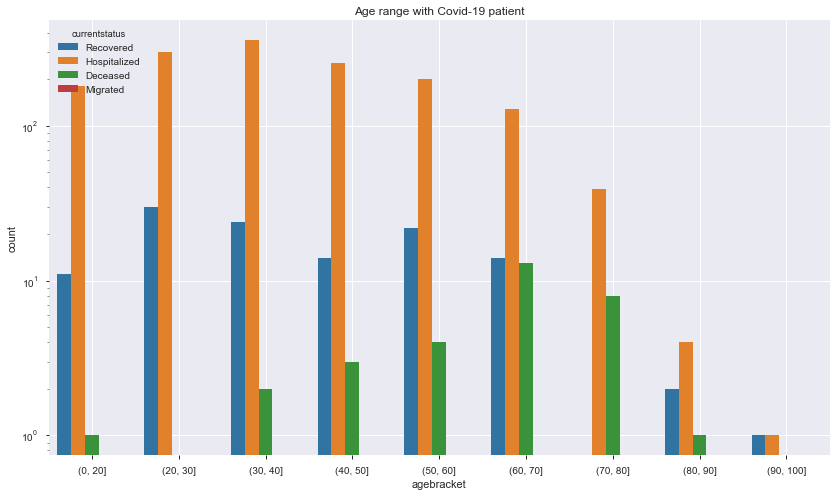

In [28]:
countplot(df_raw_data["agebracket"],df_raw_data["currentstatus"],"Age range with Covid-19 patient")

## COVID-19 - Age Range distribution across Nationality

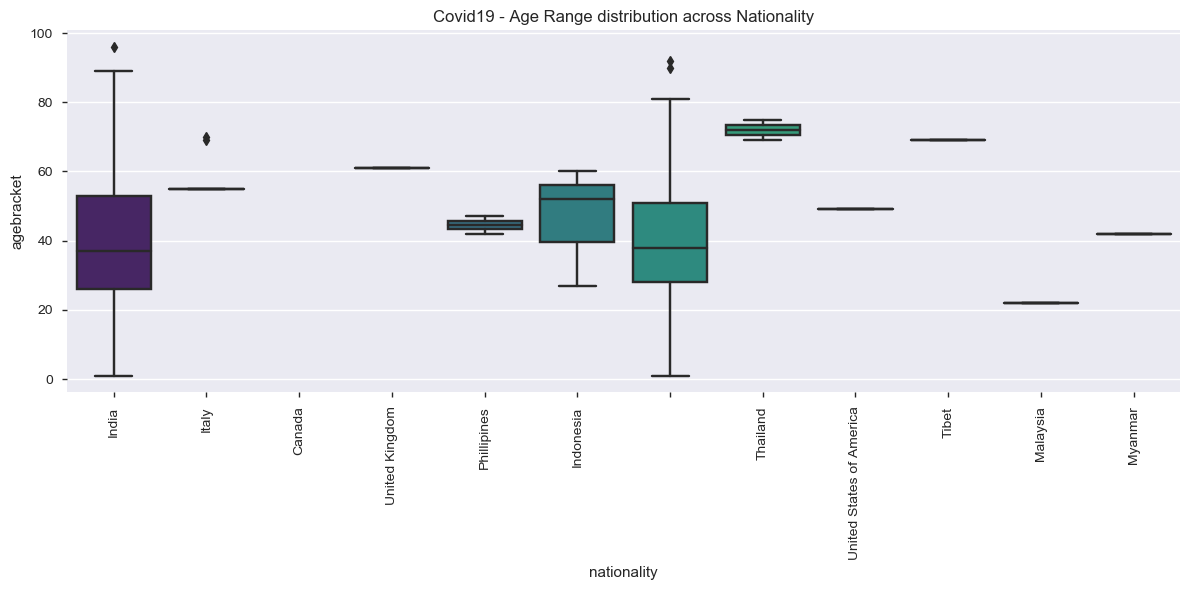

In [29]:
boxplot(df_raw_data,"nationality","agebracket","Covid19 - Age Range distribution across Nationality")

## Covid-19 Cases Distribution across States

In [30]:
state = df_raw_data.groupby('detectedstate').count()
pieChart(state , 'currentstatus' ,'Covid19 cases based on State')

## Covid-19 cases distribution based on Nationality

In [31]:
nationality = df_raw_data.groupby('nationality').count()
pieChart(nationality, 'currentstatus', 'Covid19 cases based on Nationality in India')

## No. of foreign citizens affected by Covid-19 in India

In [32]:
temp = df_raw_data.groupby('nationality')['patientnumber'].count().reset_index()
temp = temp.sort_values('patientnumber')
temp = temp[temp['nationality']!='']
temp = temp[temp['nationality']!='India']

barChart(temp , 'patientnumber' , 'nationality' , 'No. of foreign citizens' ,'h' )

## Covid-19 distribution based on Type of Transmission

In [33]:
temp = pd.DataFrame(df_raw_data[['typeoftransmission']].groupby('typeoftransmission')['typeoftransmission'].count())
temp = temp.dropna()
temp.columns = ['count']
temp = temp.reset_index().sort_values(by='count')

barChart(temp , 'count' , 'typeoftransmission' , 'Type of transmission','h' )

## Covid-19 cases Vs Age Brackets along with current status

In [34]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Cases vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df_raw_data[['agebracket', 'currentstatus']].dropna()
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('currentstatus').count()

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Deceased', 'Hospitalized', 'Recovered'], 
                     marker_colors = ['#fd0054', '#393e46', '#40a798'], hole=.3),1, 2)

fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Deceased']['agebracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Recovered']['agebracket'], nbinsx=50, name='Recovered', marker_color='#40a798'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['currentstatus']=='Hospitalized']['agebracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'), 1, 1)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[0].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 14739 
No. of missing values : 13122 
No. of available values : 1617


## Covid-19 cases Gender Vs Age Brackets along with gender distribution

In [35]:
fig = plotly.subplots.make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Gender vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = df_raw_data[['agebracket', 'gender']].dropna()
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
gen_grp = temp.groupby('gender').count()

fig.add_trace(go.Histogram(x=temp[temp['gender']=='F']['agebracket'], nbinsx=50, name='Female', marker_color='#6a0572'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['gender']=='M']['agebracket'], nbinsx=50, name='Male', marker_color='#39065a'), 1, 1)

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Female', 'Male'], marker_colors = ['#6a0572', '#39065a']),1, 2)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[2].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 14739 
No. of missing values : 13122 
No. of available values : 1617


## Covid-19 cases Age distribution of confirmed patients

In [36]:
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-df_raw_data[['agebracket']].dropna().shape[0],
      '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-df_raw_data[['agebracket']].dropna().shape[0]))

histogramChart(df_raw_data,'agebracket','Distribution of ages of confirmed patients')

Total no. of values : 14739 
No. of missing values : 13122 
No. of available values : 1617


## Covid-19 cases distribution across states

In [37]:
dist = df_raw_data.groupby(['detectedstate', 'detecteddistrict'])['patientnumber'].count().reset_index()
dist.head()

treeMapCart(dist, ['detectedstate', 'detecteddistrict'] , 'patientnumber' , 'Number of Confirmed Cases')

In [38]:
df_raw_data['statuschangedate'] = pd.to_datetime(df_raw_data['statuschangedate'])
df_raw_data['dateannounced'] = pd.to_datetime(df_raw_data['dateannounced'])

In [39]:
temp = df_raw_data[['dateannounced', 'statuschangedate', 'currentstatus']].dropna()
temp = temp[temp['statuschangedate']!=temp['dateannounced']]
temp['no_of_days'] = temp['statuschangedate'] - temp['dateannounced']
temp['no_of_days'] = temp['no_of_days'].dt.days
temp = temp[temp['no_of_days']>0]


In [40]:
print('Total no. of values :', df_raw_data.shape[0], '\nNo. of missing values :', df_raw_data.shape[0]-temp.shape[0], '\nNo. of available values :', df_raw_data.shape[0]-(df_raw_data.shape[0]-temp.shape[0]))
px.box(temp, x="currentstatus", y="dateannounced", color='currentstatus')

Total no. of values : 14739 
No. of missing values : 14627 
No. of available values : 112


### Age Distribution of Detected Cases acros States and UT¶

<Figure size 1200x600 with 0 Axes>

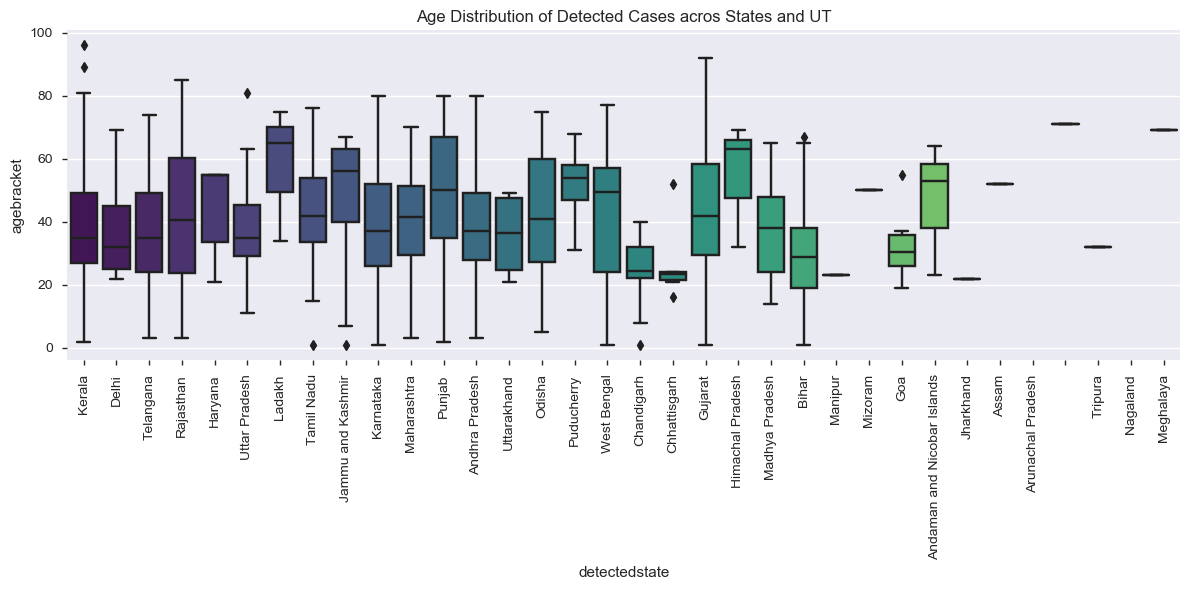

In [41]:
plt.figure(figsize=(12, 6), dpi = 100)
boxplot(df_raw_data,'detectedstate' , 'agebracket' ,'Age Distribution of Detected Cases acros States and UT')

### Age Distribution across different Nationality

<Figure size 1200x600 with 0 Axes>

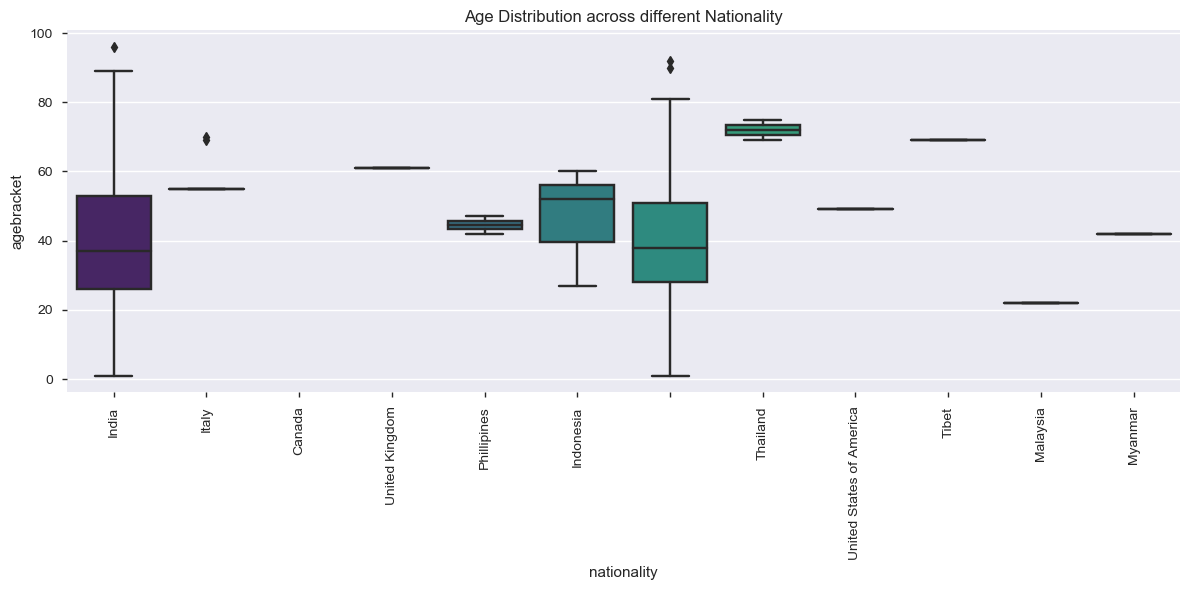

In [42]:
plt.figure(figsize=(12, 6), dpi = 100)
boxplot(df_raw_data , 'nationality' , 'agebracket' , "Age Distribution across different Nationality")

### Age Distribution of COVID-19 Recovered Patients


In [43]:
dist = df_raw_data.groupby(['agebracket','currentstatus'])['patientnumber'].count().reset_index()
dist = dist[dist['currentstatus']=='Recovered']
dist
fig = px.bar(dist, x='agebracket', y='patientnumber', orientation='v', text='patientnumber', width=1200,
       color_discrete_sequence = ['#00CC96'], title='Age distribution of Recovered COVID Patient')

fig.update_xaxes(title='Age')
fig.update_yaxes(title='# Patient')
fig.show()


### Gender Distribution of COVID-19 Recovered Patients

In [44]:
dist = df_raw_data.groupby(['gender','currentstatus'])['patientnumber'].count().reset_index()
dist = dist[dist['currentstatus']=='Recovered']
dist
fig = px.pie(dist, values=dist['patientnumber'], names=dist.gender
         ,color_discrete_sequence=["#636EFA"],title='Gender distribution of COVID19 Recovered Patients')
fig.update_traces(textposition='outside', textinfo='value+label')
fig.show()

In [45]:
df_raw_data.head()

agebracket currentstatus dateannounced              detectedcity  \
0        20.0     Recovered    2020-01-30                  Thrissur   
1         NaN     Recovered    2020-02-02                 Alappuzha   
2         NaN     Recovered    2020-03-02                 Kasaragod   
3        45.0     Recovered    2020-02-03  East Delhi (Mayur Vihar)   
4        24.0     Recovered    2020-02-03                 Hyderabad   

  detecteddistrict detectedstate gender nationality patientnumber statecode  \
0         Thrissur        Kerala      F       India             1        KL   
1        Alappuzha        Kerala              India             2        KL   
2        Kasaragod        Kerala              India             3        KL   
3       East Delhi         Delhi      M       India             4        DL   
4        Hyderabad     Telangana      M       India             5        TG   

  statepatientnumber statuschangedate typeoftransmission  durationOfAnyStatus  
0           KL-TS-P1       2020-02-14           Imported                 15.0  
1           KL-AL-P1       2020-02-14           Imported                 12.0  
2           KL-KS-P1       2020-02-14           Imported                -17.0  
3              DL-P1       2020-03-15           Imported                 41.0  
4              TS-P1       2020-02-03           Imported                  0.0

# Death and Recovered Dataset

- Understanding Data

In [46]:
print("Column Names are : \n", df_death_and_recoveries.columns)

Column Names are : 
 Index(['agebracket', 'city', 'date', 'district', 'gender', 'nationality',
       'notes', 'patientnumbercouldbemappedlater', 'patientstatus', 'slno',
       'source1', 'source2', 'source3', 'state', 'statecode'],
      dtype='object')


In [47]:
df_death_and_recoveries.shape

(2649, 15)

In [48]:
df_death_and_recoveries.tail()

agebracket city date district gender nationality notes  \
2644                                                          
2645                                                          
2646                                                          
2647                                                          
2648                                                          

     patientnumbercouldbemappedlater patientstatus  slno source1 source2  \
2644                                                2646                   
2645                                                2647                   
2646                                                2648                   
2647                                                2649                   
2648                                                2650                   

     source3 state statecode  
2644                          
2645                          
2646                          
2647                          
2648

In [49]:
#df_death_and_recoveries[0:2250]

In [50]:
df_death_and_recoveries_data = df_death_and_recoveries[0:2247]

In [51]:
print("Data Shape : Rows = {} , Columns = {}".format(df_death_and_recoveries_data.shape[0],df_death_and_recoveries_data.shape[1]))

Data Shape : Rows = 2247 , Columns = 15


In [52]:
df_death_and_recoveries_data.tail()

agebracket city        date district gender nationality notes  \
2242                  17/04/2020                                     
2243                  17/04/2020                                     
2244                  17/04/2020                                     
2245                  17/04/2020                                     
2246                  17/04/2020                                     

     patientnumbercouldbemappedlater patientstatus  slno  \
2242                                     Recovered  2244   
2243                                     Recovered  2245   
2244                                     Recovered  2246   
2245                                     Recovered  2247   
2246                                     Recovered  2248   

                                                source1 source2 source3  \
2242  https://twitter.com/ArogyaAndhra/status/125103...                   
2243  https://twitter.com/ArogyaAndhra/status/125103...                   
2244  https://twitter.com/ArogyaAndhra/status/125103...                   
2245  https://twitter.com/ArogyaAndhra/status/125103...                   
2246  https://twitter.com/ArogyaAndhra/status/125103...                   

               state statecode  
2242  Andhra Pradesh        AP  
2243  Andhra Pradesh        AP  
2244  Andhra Pradesh        AP  
2245  Andhra Pradesh        AP  
2246  Andhra Pradesh        AP

In [53]:
df_death_and_recoveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 15 columns):
agebracket                         2247 non-null object
city                               2247 non-null object
date                               2247 non-null object
district                           2247 non-null object
gender                             2247 non-null object
nationality                        2247 non-null object
notes                              2247 non-null object
patientnumbercouldbemappedlater    2247 non-null object
patientstatus                      2247 non-null object
slno                               2247 non-null object
source1                            2247 non-null object
source2                            2247 non-null object
source3                            2247 non-null object
state                              2247 non-null object
statecode                          2247 non-null object
dtypes: object(15)
memory usage: 263.4+ KB


**Observations**
1. agebracket should be numaric. 
2. date should be date time type. 

In [54]:
profile = pandas_profiling.ProfileReport(df_death_and_recoveries_data)
profile.to_file(output_file="covid19_death_and_recoveries_data_before_preprocessing_17thApril.html")
print("Pre Profiling of death and recoveries data is completed")

Pre Profiling of death and recoveries data is completed


**Observations**
1. agebracket has a high cardinality: 62 distinct values 
2. city has a high cardinality: 54 distinct values 
3. district has a high cardinality: 144 distinct values
4. notes has a high cardinality: 269 distinct values
5. patientnumbercouldbemappedlater has a high cardinality: 61 distinct values
6. source1 has a high cardinality: 332 distinct values 
7. source2 has a high cardinality: 87 distinct values

## Pre-Processing

In [55]:
df_death_and_recoveries_data['agebracket'] = pd.to_numeric(df_death_and_recoveries_data['agebracket'], errors='coerce')

In [56]:
df_death_and_recoveries_data['agebracket'] = df_death_and_recoveries_data['agebracket'].astype('float')

In [57]:
df_death_and_recoveries_data['date'] = pd.to_datetime(df_death_and_recoveries_data['date'])
df_death_and_recoveries_data['date'] = df_death_and_recoveries_data['date'].dt.strftime('%Y-%m-%d')

In [58]:
df_death_and_recoveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 15 columns):
agebracket                         252 non-null float64
city                               2247 non-null object
date                               2247 non-null object
district                           2247 non-null object
gender                             2247 non-null object
nationality                        2247 non-null object
notes                              2247 non-null object
patientnumbercouldbemappedlater    2247 non-null object
patientstatus                      2247 non-null object
slno                               2247 non-null object
source1                            2247 non-null object
source2                            2247 non-null object
source3                            2247 non-null object
state                              2247 non-null object
statecode                          2247 non-null object
dtypes: float64(1), object(14)
memory usage: 263.4+ K

In [59]:
df_death_and_recoveries_data.describe()

agebracket
count  252.000000
mean    54.234127
std     17.187412
min      1.000000
25%     45.000000
50%     56.000000
75%     66.000000
max     95.000000

In [60]:
df_death_and_recoveries_data['agebracket'].isnull().sum()

1995

In [61]:
df_death_and_recoveries_data.drop(['slno','source1','source2','source3','patientnumbercouldbemappedlater'], axis = 1, inplace = True)

In [62]:
print("Column Names are : \n", df_death_and_recoveries_data.columns)

Column Names are : 
 Index(['agebracket', 'city', 'date', 'district', 'gender', 'nationality',
       'notes', 'patientstatus', 'state', 'statecode'],
      dtype='object')


In [63]:
print("Data Shape : Rows = {} , Columns = {}".format(df_death_and_recoveries_data.shape[0],df_death_and_recoveries_data.shape[1]))

Data Shape : Rows = 2247 , Columns = 10


## Post Profiling

In [64]:
profile = pandas_profiling.ProfileReport(df_death_and_recoveries_data)
profile.to_file(output_file="covid19_death_and_recoveries_data_after_preprocessing_17thApril.html")
print("Post Profiling of death and recoveries data is completed")

Post Profiling of death and recoveries data is completed


In [65]:
df_death_and_recoveries_data.head()

agebracket       city        date         district gender nationality  \
0        85.0     Mumbai  2020-03-29           Mumbai      M               
1        80.0     Mumbai  2020-03-29           Mumbai      M               
2        86.0  Ghatkopar  2020-03-29  Mumbai Suburban      F               
3         NaN             2020-03-29           Mumbai                      
4         NaN             2020-03-29           Mumbai                      

                                               notes patientstatus  \
0  Suffering from Diabetes, had a pacemaker, no t...      Deceased   
1  patient passed away at the Fortis Hospital, Mu...      Deceased   
2                                                         Deceased   
3                                                         Deceased   
4                                                         Deceased   

         state statecode  
0  Maharashtra        MH  
1  Maharashtra        MH  
2  Maharashtra        MH  
3  Maharashtra        MH  
4  Maharashtra        MH

**How to treat age as NaN ?**

## Exploratory Data Analysis 

### Q1. Age range distribution with recovered and death

In [66]:
for age in range(9,0,-1):
    df_death_and_recoveries_data.loc[df_death_and_recoveries_data['agebracket']<=age*10, 'Age_bin'] = age 
    print(age)

9
8
7
6
5
4
3
2
1


In [67]:
df_death_and_recoveries_data.groupby(['patientstatus','Age_bin'])['patientstatus'].count()

patientstatus          Age_bin
Deceased               1.0         1
                       2.0         2
                       3.0         3
                       4.0         7
                       5.0        30
                       6.0        50
                       7.0        51
                       8.0        29
                       9.0         4
NotCountedbyAnyState#  6.0         2
                       7.0         1
                       8.0         1
Recovered              1.0         2
                       2.0         3
                       3.0        16
                       4.0        18
                       5.0         9
                       6.0         7
                       7.0        11
                       8.0         3
Name: patientstatus, dtype: int64

In [68]:
df_death_and_recoveries_data['patientstatus'].value_counts()

Recovered                1793
Deceased                  450
NotCountedbyAnyState#       4
Name: patientstatus, dtype: int64

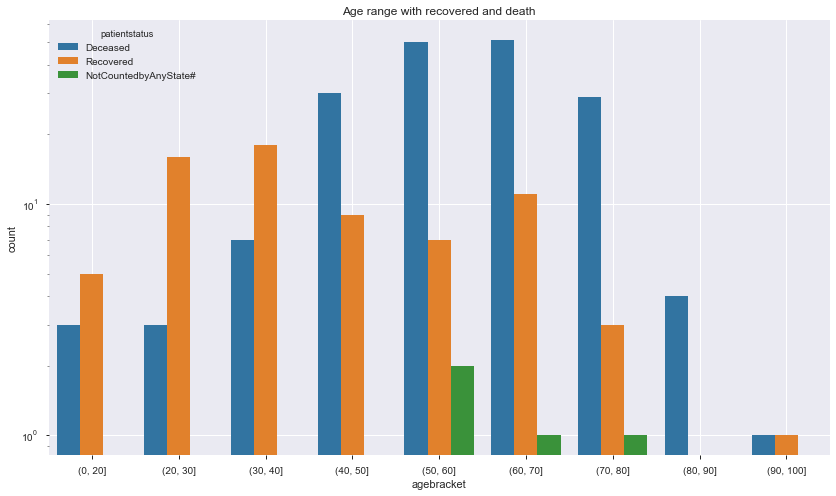

In [69]:
countplot(df_death_and_recoveries_data['agebracket'],df_death_and_recoveries_data['patientstatus'],'Age range with recovered and death')

## State vs Current Status

In [70]:
df_death_and_recoveries_data['district'].value_counts().sort_values(ascending = False).head(20)

                       1456
Mumbai                  122
Kasaragod                96
Pune                     50
Kannur                   36
Ahmadabad                32
Indore                   26
Gurugram                 17
Ernakulam                14
Italians                 14
Agra                     13
Bhavnagar                12
Thrissur                 12
Malappuram               11
Hyderabad                11
Kozhikode                10
Meerut                   10
Faridabad                10
Surat                    10
Gautam Buddha Nagar      10
Name: district, dtype: int64

In [71]:
to_20_district = ['Mumbai','Kasaragod','Pune','Kannur','Ahmadabad','Indore','Gurugram','Italians','Ernakulam','Agra','Thrissur','Malappuram','Kozhikode','Hyderabad','Faridabad','Meerut','Gautam Buddha Nagar','Bengaluru','Bhavnagar']

In [72]:
df_death_and_recoveries_data[df_death_and_recoveries_data['district'].isin(to_20_district)].groupby(df_death_and_recoveries_data['district'])['patientstatus'].value_counts()

district             patientstatus
Agra                 Recovered          8
                     Deceased           5
Ahmadabad            Deceased          17
                     Recovered         15
Bengaluru            Recovered          6
                     Deceased           3
Bhavnagar            Recovered          9
                     Deceased           3
Ernakulam            Recovered         14
Faridabad            Recovered         10
Gautam Buddha Nagar  Recovered         10
Gurugram             Recovered         17
Hyderabad            Deceased          10
                     Recovered          1
Indore               Deceased          26
Italians             Recovered         14
Kannur               Recovered         36
Kasaragod            Recovered         96
Kozhikode            Recovered         10
Malappuram           Recovered         11
Meerut               Recovered          9
                     Deceased           1
Mumbai               Deceased         108

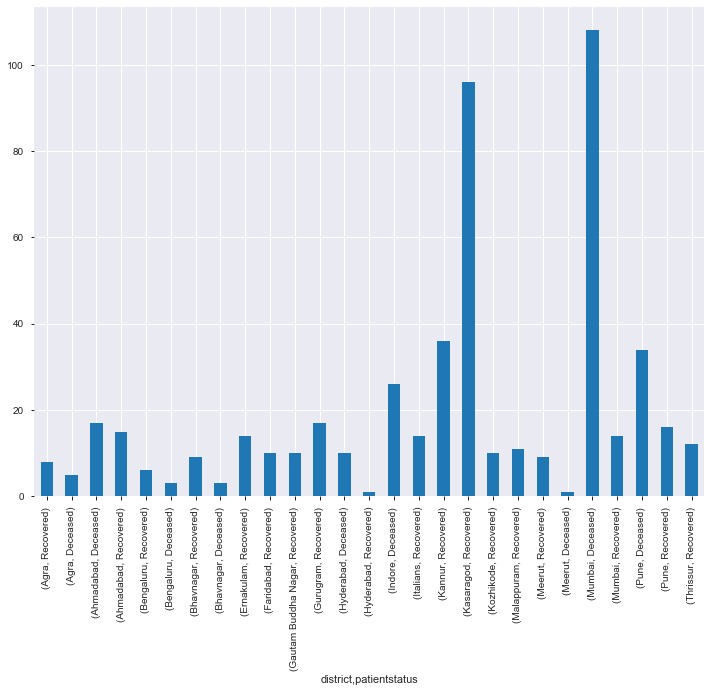

In [77]:
plt.figure(figsize=(12,9))
df_death_and_recoveries_data[df_death_and_recoveries_data['district'].isin(to_20_district)].groupby(df_death_and_recoveries_data['district'])['patientstatus'].value_counts().plot.bar(stacked=True)


In [74]:
for i in df_death_and_recoveries_data['state'].unique():
    print ('-----------',i,'-----------')
    print (df_death_and_recoveries_data[df_death_and_recoveries_data['state']==i].groupby(df_death_and_recoveries_data['district'])['patientstatus'].value_counts())

----------- Maharashtra -----------
district         patientstatus
                 Recovered        261
                 Deceased          28
Ahmadnagar       Deceased           1
                 Recovered          1
Akola            Deceased           1
Amravati         Deceased           1
Aurangabad       Deceased           2
                 Recovered          1
Buldana          Deceased           1
Dhule            Deceased           1
Mumbai           Deceased         108
                 Recovered         14
Mumbai Suburban  Deceased           1
Nagpur           Recovered          4
                 Deceased           1
Nashik           Deceased           1
Palghar          Deceased           3
Pune             Deceased          34
                 Recovered         16
Satara           Deceased           1
Solapur          Deceased           1
Thane            Deceased           9
Yavatmal         Recovered          3
Name: patientstatus, dtype: int64
----------- Kerala ------

----------- Meghalaya -----------
district  patientstatus
          Deceased         1
Name: patientstatus, dtype: int64
----------- Tripura -----------
district  patientstatus
          Recovered        1
Name: patientstatus, dtype: int64
----------- Arunachal Pradesh -----------
district  patientstatus
          Recovered        1
Name: patientstatus, dtype: int64
